# Read Data

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"rezaseidgar","key":"8707ca4acaf7e599f9a5345f4a576db0"}'}

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d rounakbanik/the-movies-dataset

 95% 217M/228M [00:01<00:00, 154MB/s]
100% 228M/228M [00:01<00:00, 125MB/s]


In [ ]:
!ls

kaggle.json  sample_data  the-movies-dataset.zip


In [ ]:
!unzip '/content/the-movies-dataset.zip' -d '/content/'

Archive:  /content/the-movies-dataset.zip
  inflating: /content/credits.csv    
  inflating: /content/keywords.csv   
  inflating: /content/links.csv      
  inflating: /content/links_small.csv  
  inflating: /content/movies_metadata.csv  
  inflating: /content/ratings.csv    
  inflating: /content/ratings_small.csv  


In [ ]:
data = pd.read_csv('/content/movies_metadata.csv')
data.head()

<ipython-input-17-6437ea7ef650>:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/movies_metadata.csv')


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


# PreProcessing

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [ ]:
selected_columns = ['adult', 'budget', 'genres', 'popularity', 'vote_average','original_language','release_date','revenue','runtime','vote_count','title','poster_path']

data = data.loc[:, selected_columns]

data.head()

,adult,budget,genres,popularity,vote_average,original_language,release_date,revenue,runtime,vote_count,title,poster_path
0,False,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",21.946943,7.7,en,1995-10-30,373554033.0,81.0,5415.0,Toy Story,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg
1,False,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",17.015539,6.9,en,1995-12-15,262797249.0,104.0,2413.0,Jumanji,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg
2,False,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",11.7129,6.5,en,1995-12-22,0.0,101.0,92.0,Grumpier Old Men,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg
3,False,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",3.859495,6.1,en,1995-12-22,81452156.0,127.0,34.0,Waiting to Exhale,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg
4,False,0,"[{'id': 35, 'name': 'Comedy'}]",8.387519,5.7,en,1995-02-10,76578911.0,106.0,173.0,Father of the Bride Part II,/e64sOI48hQXyru7naBFyssKFxVd.jpg


In [ ]:
def get_main_genre(genres):
  cleaned_string = genres.strip("[]")
  if not cleaned_string == '':
    list_data = cleaned_string.split(", ")
    ex = list_data[1].split("'")
    if not ex[1] == 'id':
      return ex[3]
  return ' '


data['main_genre'] = data['genres'].apply(get_main_genre)

data.head()

,adult,budget,genres,popularity,vote_average,original_language,release_date,revenue,runtime,vote_count,title,poster_path,main_genre
0,False,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",21.946943,7.7,en,1995-10-30,373554033.0,81.0,5415.0,Toy Story,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,Animation
1,False,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",17.015539,6.9,en,1995-12-15,262797249.0,104.0,2413.0,Jumanji,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,Adventure
2,False,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",11.7129,6.5,en,1995-12-22,0.0,101.0,92.0,Grumpier Old Men,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,Romance
3,False,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",3.859495,6.1,en,1995-12-22,81452156.0,127.0,34.0,Waiting to Exhale,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,Comedy
4,False,0,"[{'id': 35, 'name': 'Comedy'}]",8.387519,5.7,en,1995-02-10,76578911.0,106.0,173.0,Father of the Bride Part II,/e64sOI48hQXyru7naBFyssKFxVd.jpg,Comedy


In [ ]:
data.drop(columns='genres', inplace=True)
data.head()

,adult,budget,popularity,vote_average,original_language,release_date,revenue,runtime,vote_count,title,poster_path,main_genre
0,False,30000000,21.946943,7.7,en,1995-10-30,373554033.0,81.0,5415.0,Toy Story,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,Animation
1,False,65000000,17.015539,6.9,en,1995-12-15,262797249.0,104.0,2413.0,Jumanji,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,Adventure
2,False,0,11.7129,6.5,en,1995-12-22,0.0,101.0,92.0,Grumpier Old Men,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,Romance
3,False,16000000,3.859495,6.1,en,1995-12-22,81452156.0,127.0,34.0,Waiting to Exhale,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,Comedy
4,False,0,8.387519,5.7,en,1995-02-10,76578911.0,106.0,173.0,Father of the Bride Part II,/e64sOI48hQXyru7naBFyssKFxVd.jpg,Comedy


In [ ]:
len(data)

45466

In [ ]:
data.isna().sum()

adult                  0
budget                 0
popularity             5
vote_average           6
original_language     11
release_date          87
revenue                6
runtime              263
vote_count             6
title                  6
poster_path          386
main_genre             0
dtype: int64

In [ ]:
data.dropna(inplace=True)
len(data)

44797

In [ ]:
data.isna().sum()

adult                0
budget               0
popularity           0
vote_average         0
original_language    0
release_date         0
revenue              0
runtime              0
vote_count           0
title                0
poster_path          0
main_genre           0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44797 entries, 0 to 45465
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   adult              44797 non-null  object 
 1   budget             44797 non-null  object 
 2   popularity         44797 non-null  object 
 3   vote_average       44797 non-null  float64
 4   original_language  44797 non-null  object 
 5   release_date       44797 non-null  object 
 6   revenue            44797 non-null  float64
 7   runtime            44797 non-null  float64
 8   vote_count         44797 non-null  float64
 9   title              44797 non-null  object 
 10  poster_path        44797 non-null  object 
 11  main_genre         44797 non-null  object 
dtypes: float64(4), object(8)
memory usage: 4.4+ MB


In [ ]:
data['budget'] = pd.to_numeric(data['budget'], errors='coerce')
data['popularity'] = pd.to_numeric(data['popularity'], errors='coerce')

In [ ]:
zero_percentages = (data == 0).mean()
zero_percentages

adult                0.000000
budget               0.801906
popularity           0.000647
vote_average         0.058374
original_language    0.000000
release_date         0.000000
revenue              0.834788
runtime              0.032413
vote_count           0.056209
title                0.000000
poster_path          0.000000
main_genre           0.000000
dtype: float64

In [ ]:
columns_to_drop = zero_percentages[zero_percentages > 0.7].index
columns_to_drop

Index(['budget', 'revenue'], dtype='object')

In [ ]:
data = data.drop(columns=columns_to_drop)
data.head()

,adult,popularity,vote_average,original_language,release_date,runtime,vote_count,title,poster_path,main_genre
0,False,21.946943,7.7,en,1995-10-30,81.0,5415.0,Toy Story,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,Animation
1,False,17.015539,6.9,en,1995-12-15,104.0,2413.0,Jumanji,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,Adventure
2,False,11.712900,6.5,en,1995-12-22,101.0,92.0,Grumpier Old Men,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,Romance
3,False,3.859495,6.1,en,1995-12-22,127.0,34.0,Waiting to Exhale,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,Comedy
4,False,8.387519,5.7,en,1995-02-10,106.0,173.0,Father of the Bride Part II,/e64sOI48hQXyru7naBFyssKFxVd.jpg,Comedy


In [ ]:
len(data)

44797

In [ ]:
data.drop(data[(data['popularity'] == 0) | (data['vote_average'] == 0) | (data['runtime'] == 0)| (data['vote_count'] == 0) ].index,inplace=True)
len(data)

41006

In [ ]:
data['release_year'] = data['release_date'].str.split('-').str[0]
data.drop(columns='release_date', inplace=True)
data.head()

,adult,popularity,vote_average,original_language,runtime,vote_count,title,poster_path,main_genre,release_year
0,False,21.946943,7.7,en,81.0,5415.0,Toy Story,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,Animation,1995
1,False,17.015539,6.9,en,104.0,2413.0,Jumanji,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,Adventure,1995
2,False,11.712900,6.5,en,101.0,92.0,Grumpier Old Men,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,Romance,1995
3,False,3.859495,6.1,en,127.0,34.0,Waiting to Exhale,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,Comedy,1995
4,False,8.387519,5.7,en,106.0,173.0,Father of the Bride Part II,/e64sOI48hQXyru7naBFyssKFxVd.jpg,Comedy,1995


In [ ]:
data['release_year'] = pd.to_numeric(data['release_year'], errors='coerce')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41006 entries, 0 to 45463
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   adult              41006 non-null  object 
 1   popularity         41006 non-null  float64
 2   vote_average       41006 non-null  float64
 3   original_language  41006 non-null  object 
 4   runtime            41006 non-null  float64
 5   vote_count         41006 non-null  float64
 6   title              41006 non-null  object 
 7   poster_path        41006 non-null  object 
 8   main_genre         41006 non-null  object 
 9   release_year       41006 non-null  int64  
dtypes: float64(4), int64(1), object(5)
memory usage: 3.4+ MB


In [ ]:
for col in data.columns :
  if data[col].dtype == 'object' or data[col].dtype == 'bool':
    print(col)
    print(data[col].value_counts())
    print('_______________________________')

adult
False    41000
True         6
Name: adult, dtype: int64
_______________________________
original_language
en    29422
fr     2216
ja     1282
it     1133
de      926
      ...  
qu        1
rw        1
eo        1
zu        1
si        1
Name: original_language, Length: 85, dtype: int64
_______________________________
title
Cinderella                       11
Alice in Wonderland               9
Hamlet                            8
Beauty and the Beast              7
Treasure Island                   7
                                 ..
Yeelen                            1
Until Death                       1
Doomwatch                         1
The Last Remake of Beau Geste     1
Century of Birthing               1
Name: title, Length: 38162, dtype: int64
_______________________________
poster_path
/5D7UBSEgdyONE6Lql6xS7s6OLcW.jpg    5
/2kslZXOaW0HmnGuVPCnQlCdXFR9.jpg    4
/8VSZ9coCzxOCW2wE2Qene1H1fKO.jpg    3
/cdwVC18URfEdQjjxqJyRMoGDC0H.jpg    3
/kHaBqrrozaG7rj6GJg3sUCiM29B.jpg   

In [ ]:
unique_languages = data['original_language'].unique()
top_languages = data['original_language'].value_counts().head(5).index
top_languages

Index(['en', 'fr', 'ja', 'it', 'de'], dtype='object')

In [ ]:
unique_languages = data['original_language'].unique()
top_languages = data['original_language'].value_counts().head(5).index
def reduce_languages(lang):
    if lang in top_languages:
        return lang
    else:
        return 'Other'
data['reduced_language'] = data['original_language'].apply(reduce_languages)
data.drop('original_language', axis=1, inplace=True)


In [ ]:
for col in data.columns :
  if data[col].dtype == 'object' or data[col].dtype == 'bool':
    print(col)
    print(data[col].value_counts())
    print('_______________________________')

adult
False    41000
True         6
Name: adult, dtype: int64
_______________________________
title
Cinderella                       11
Alice in Wonderland               9
Hamlet                            8
Beauty and the Beast              7
Treasure Island                   7
                                 ..
Yeelen                            1
Until Death                       1
Doomwatch                         1
The Last Remake of Beau Geste     1
Century of Birthing               1
Name: title, Length: 38162, dtype: int64
_______________________________
poster_path
/5D7UBSEgdyONE6Lql6xS7s6OLcW.jpg    5
/2kslZXOaW0HmnGuVPCnQlCdXFR9.jpg    4
/8VSZ9coCzxOCW2wE2Qene1H1fKO.jpg    3
/cdwVC18URfEdQjjxqJyRMoGDC0H.jpg    3
/kHaBqrrozaG7rj6GJg3sUCiM29B.jpg    2
                                   ..
/87hBYllqgK7iNtpDyLLjIhlMG6d.jpg    1
/dXqtL2xB4neAjDP4rLIEAJZLJYy.jpg    1
/8FG75K93VthDw8HG3ozzrjp8V5b.jpg    1
/zbmkx0w5ytRDQshLbvKjmswD6lB.jpg    1
/d5bX92nDsISNhu3ZT69uHwmfCGw.jpg    1
N

In [ ]:
unique_languages = data['main_genre'].unique()
top_languages = data['main_genre'].value_counts().head(5).index
top_languages

Index(['Drama', 'Comedy', 'Action', 'Documentary', 'Horror'], dtype='object')

In [ ]:
unique_languages = data['main_genre'].unique()
top_languages = data['main_genre'].value_counts().head(5).index
def reduce_languages(lang):
    if lang in top_languages:
        return lang
    else:
        return 'Other'
data['reduced_genre'] = data['main_genre'].apply(reduce_languages)
data.drop('main_genre', axis=1, inplace=True)


In [ ]:
for col in data.columns :
  if data[col].dtype == 'object' or data[col].dtype == 'bool':
    print(col)
    print(data[col].value_counts())
    print('_______________________________')

adult
False    41000
True         6
Name: adult, dtype: int64
_______________________________
title
Cinderella                       11
Alice in Wonderland               9
Hamlet                            8
Beauty and the Beast              7
Treasure Island                   7
                                 ..
Yeelen                            1
Until Death                       1
Doomwatch                         1
The Last Remake of Beau Geste     1
Century of Birthing               1
Name: title, Length: 38162, dtype: int64
_______________________________
poster_path
/5D7UBSEgdyONE6Lql6xS7s6OLcW.jpg    5
/2kslZXOaW0HmnGuVPCnQlCdXFR9.jpg    4
/8VSZ9coCzxOCW2wE2Qene1H1fKO.jpg    3
/cdwVC18URfEdQjjxqJyRMoGDC0H.jpg    3
/kHaBqrrozaG7rj6GJg3sUCiM29B.jpg    2
                                   ..
/87hBYllqgK7iNtpDyLLjIhlMG6d.jpg    1
/dXqtL2xB4neAjDP4rLIEAJZLJYy.jpg    1
/8FG75K93VthDw8HG3ozzrjp8V5b.jpg    1
/zbmkx0w5ytRDQshLbvKjmswD6lB.jpg    1
/d5bX92nDsISNhu3ZT69uHwmfCGw.jpg    1
N

In [ ]:
data.drop(columns='adult', inplace=True)
data.head()

,popularity,vote_average,runtime,vote_count,title,poster_path,release_year,reduced_language,reduced_genre
0,21.946943,7.7,81.0,5415.0,Toy Story,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,1995,en,Other
1,17.015539,6.9,104.0,2413.0,Jumanji,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,1995,en,Other
2,11.712900,6.5,101.0,92.0,Grumpier Old Men,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,1995,en,Other
3,3.859495,6.1,127.0,34.0,Waiting to Exhale,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,1995,en,Comedy
4,8.387519,5.7,106.0,173.0,Father of the Bride Part II,/e64sOI48hQXyru7naBFyssKFxVd.jpg,1995,en,Comedy


In [ ]:
len(data)

41006

In [ ]:
# import pandas as pd

# def remove_outliers(data, columns):
#     for column in columns:
#         Q1 = data[column].quantile(0.25)
#         Q3 = data[column].quantile(0.75)
#         IQR = Q3 - Q1

#         lower_bound = Q1 - 1.5 * IQR
#         upper_bound = Q3 + 1.5 * IQR

#         data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

#     return data

# columns_to_remove_outliers = ['popularity', 'vote_average', 'runtime', 'vote_count', 'release_year']

# data = remove_outliers(data, columns_to_remove_outliers)


In [ ]:
len(data)

41006

In [ ]:
from sklearn.preprocessing import OneHotEncoder
numeric_columns = ['popularity', 'vote_average', 'runtime', 'vote_count', 'release_year']

# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

categorical_columns = ['reduced_language', 'reduced_genre']

encoder = OneHotEncoder(sparse=False, drop='first')
encoded_data = pd.get_dummies(data[categorical_columns])
data = pd.concat([data, encoded_data], axis=1)

data = data.drop(categorical_columns, axis=1)
data.head()

,popularity,vote_average,runtime,vote_count,title,poster_path,release_year,reduced_language_Other,reduced_language_de,reduced_language_en,reduced_language_fr,reduced_language_it,reduced_language_ja,reduced_genre_Action,reduced_genre_Comedy,reduced_genre_Documentary,reduced_genre_Drama,reduced_genre_Horror,reduced_genre_Other
0,3.001035,1.352160,-0.496300,10.259711,Toy Story,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,0.123688,0,0,1,0,0,0,0,0,0,0,0,1
1,2.211561,0.707530,0.168570,4.441283,Jumanji,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,0.123688,0,0,1,0,0,0,0,0,0,0,0,1
2,1.362654,0.385214,0.081848,-0.057241,Grumpier Old Men,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,0.123688,0,0,1,0,0,0,0,0,0,0,0,1
3,0.105392,0.062899,0.833440,-0.169656,Waiting to Exhale,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,0.123688,0,0,1,0,0,0,0,1,0,0,0,0
4,0.830289,-0.259416,0.226385,0.099751,Father of the Bride Part II,/e64sOI48hQXyru7naBFyssKFxVd.jpg,0.123688,0,0,1,0,0,0,0,1,0,0,0,0


In [ ]:
import joblib

joblib.dump(scaler, 'scaler_model.pkl')

['scaler_model.pkl']

In [ ]:
urls = f"https://image.tmdb.org/t/p/w500{data['poster_path']}"
data = data.drop(columns='poster_path')
urls

'https://image.tmdb.org/t/p/w5000        /rhIRbceoE9lR4veEXuwCC2wARtG.jpg\n1        /vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg\n2        /6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg\n3        /16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg\n4        /e64sOI48hQXyru7naBFyssKFxVd.jpg\n                       ...               \n45458    /lXtoHVdej6kS1Dc7KAhw05sMos9.jpg\n45459    /4lF9LH0b0Z1X94xGK9IOzqEW6k1.jpg\n45460    /fQC46NglNiEMZBv5XHoyLuOWoN5.jpg\n45462    /xZkmxsNmYXJbKVsTRLLx3pqGHx7.jpg\n45463    /d5bX92nDsISNhu3ZT69uHwmfCGw.jpg\nName: poster_path, Length: 41006, dtype: object'

In [ ]:
titles = data['title']
data = data.drop(columns='title')
data.head()

,popularity,vote_average,runtime,vote_count,release_year,reduced_language_Other,reduced_language_de,reduced_language_en,reduced_language_fr,reduced_language_it,reduced_language_ja,reduced_genre_Action,reduced_genre_Comedy,reduced_genre_Documentary,reduced_genre_Drama,reduced_genre_Horror,reduced_genre_Other
0,3.001035,1.352160,-0.496300,10.259711,0.123688,0,0,1,0,0,0,0,0,0,0,0,1
1,2.211561,0.707530,0.168570,4.441283,0.123688,0,0,1,0,0,0,0,0,0,0,0,1
2,1.362654,0.385214,0.081848,-0.057241,0.123688,0,0,1,0,0,0,0,0,0,0,0,1
3,0.105392,0.062899,0.833440,-0.169656,0.123688,0,0,1,0,0,0,0,1,0,0,0,0
4,0.830289,-0.259416,0.226385,0.099751,0.123688,0,0,1,0,0,0,0,1,0,0,0,0


# Kmeans

In [ ]:
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score

In [ ]:
kmn = KMeans(n_clusters=15, n_init=10)
kmn.fit(data)
y_clusters = kmn.fit_predict(data)

In [ ]:
from sklearn.decomposition import PCA
import numpy as np

pca = PCA(n_components = 3)
data_sample_vis3 = pca.fit_transform(data)
data_sample_vis3=pd.DataFrame(data_sample_vis3)

data_sample_vis3.head()

,0,1,2
0,8.645043,1.836482,3.537810
1,4.478017,0.767572,1.522045
2,0.982555,0.072537,0.286263
3,0.225774,-0.394215,-0.501609
4,0.619689,0.376591,-0.075371


In [ ]:
data_sample_vis3['cluster'] = y_clusters
data_sample_vis3.head()

,0,1,2,cluster
0,8.645043,1.836482,3.537810,4
1,4.478017,0.767572,1.522045,12
2,0.982555,0.072537,0.286263,9
3,0.225774,-0.394215,-0.501609,14
4,0.619689,0.376591,-0.075371,9


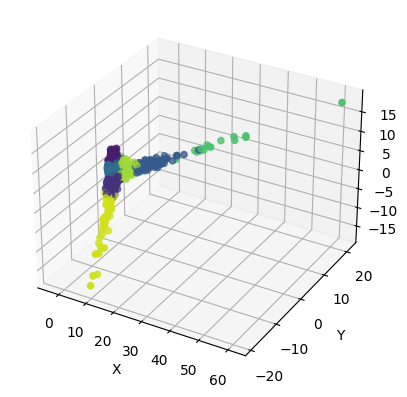

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# داده‌ها
x = data_sample_vis3[0]
y = data_sample_vis3[1]
z = data_sample_vis3[2]
labels = data_sample_vis3['cluster']

# تنظیمات نمودار
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# نمایش داده‌ها با رنگ‌های متفاوت بر اساس برچسب‌ها
ax.scatter(x, y, z, c=labels, cmap='viridis', marker='o')

# تنظیم محورها
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# نمایش نمودار
plt.show()


In [ ]:
from sklearn.decomposition import PCA
import numpy as np

pca = PCA(n_components = 2)
data_sample_vis2 = pca.fit_transform(data)
data_sample_vis2=pd.DataFrame(data_sample_vis2)

data_sample_vis2.head()

,0,1
0,8.645043,1.836481
1,4.478017,0.767572
2,0.982555,0.072537
3,0.225774,-0.394215
4,0.619689,0.376591


In [ ]:
data_sample_vis2['cluster'] = y_clusters
data_sample_vis2.head()

,0,1,cluster
0,8.645043,1.836481,4
1,4.478017,0.767572,12
2,0.982555,0.072537,9
3,0.225774,-0.394215,14
4,0.619689,0.376591,9


<Axes: xlabel='0', ylabel='1'>

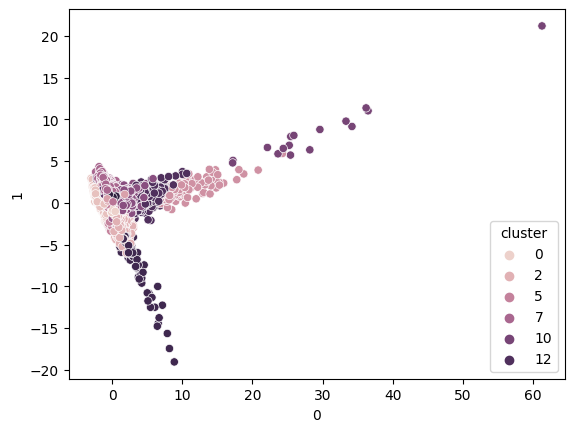

In [ ]:
import seaborn as sb
sb.scatterplot(data=data_sample_vis2, x=0, y=1, hue="cluster")

In [ ]:
df = pd.DataFrame({'titles': titles, 'clusters': y_clusters, 'poster_url':urls})
df.head()

,titles,clusters,poster_url
0,Toy Story,4,https://image.tmdb.org/t/p/w5000 /rhIRb...
1,Jumanji,12,https://image.tmdb.org/t/p/w5000 /rhIRb...
2,Grumpier Old Men,9,https://image.tmdb.org/t/p/w5000 /rhIRb...
3,Waiting to Exhale,14,https://image.tmdb.org/t/p/w5000 /rhIRb...
4,Father of the Bride Part II,9,https://image.tmdb.org/t/p/w5000 /rhIRb...


In [ ]:
cluster_counts = df['clusters'].value_counts()

is_min_rows = cluster_counts >= 6
has_false = np.any(is_min_rows == False)

print(has_false)

False


In [ ]:
data['titles'] = titles
data['clusters'] = y_clusters
data.head()

,popularity,vote_average,runtime,vote_count,release_year,reduced_language_Other,reduced_language_de,reduced_language_en,reduced_language_fr,reduced_language_it,reduced_language_ja,reduced_genre_Action,reduced_genre_Comedy,reduced_genre_Documentary,reduced_genre_Drama,reduced_genre_Horror,reduced_genre_Other,titles,clusters
0,3.001035,1.352160,-0.496300,10.259711,0.123688,0,0,1,0,0,0,0,0,0,0,0,1,Toy Story,4
1,2.211561,0.707530,0.168570,4.441283,0.123688,0,0,1,0,0,0,0,0,0,0,0,1,Jumanji,12
2,1.362654,0.385214,0.081848,-0.057241,0.123688,0,0,1,0,0,0,0,0,0,0,0,1,Grumpier Old Men,9
3,0.105392,0.062899,0.833440,-0.169656,0.123688,0,0,1,0,0,0,0,1,0,0,0,0,Waiting to Exhale,14
4,0.830289,-0.259416,0.226385,0.099751,0.123688,0,0,1,0,0,0,0,1,0,0,0,0,Father of the Bride Part II,9


In [ ]:
data.to_csv('finaloutput.csv', index=False)

In [ ]:
df.to_csv('output.csv', index=False)

In [ ]:
import pickle

with open('model_filename.pkl', 'wb') as file:
    pickle.dump(kmn, file)
